### Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import re
import string

### Masukan Data Hoax dan Fakta

In [ ]:
from google.colab import files
upload = files.upload()

In [ ]:
df_train = pd.read_csv("nama file.txt", sep=" ")
df_test = pd.read_csv("nafa file.txt", sep=" ")

FileNotFoundError: ignored

In [ ]:
#Cek head data hoax
df_train.head(5)

NameError: ignored

In [ ]:
#cek head data fakta
df_test.head(5)

NameError: ignored

In [ ]:
df_fakta = df_fakta[df_fakta["label"] == 0]
df_fakta.head(5)

,ID,label,tanggal,judul,narasi,nama file gambar
19,6775,0,25-Oct-17,Sandi Sarankan Warga Ngadu ke Kelurahan Saja,Astaga! Sandiaga Sarankan Warga Ngadu ke Kelur...,6775.jpg
21,7038,0,13-Jul-17,"Irina, Istri Ahli IT Hermansyah disebut Mantan...","Irina, Istri Ahli IT Hermansyah disebut Mantan...",7038.jpg
22,7214,0,8-Mar-17,"Nezar Patria adalah Kader PKI, Ikut Rapat Seti...","Nezar Patria adalah Kader PKI, Ikut Rapat Seti...",7214.jpg
55,13483,0,17-Jul-18,Coach Indra Sjafri: Saya Pernah 1 Tahun Tak Di...,Kendati sukses mengantarkan Timnas Indonesia U...,13483.png
58,13907,0,28-Apr-18,Kronologis Polisi Berondong Sedan Terobos Razi...,"Innalillah… Hanya Karena Lalai Terobos Razia, ...",13907.png


In [ ]:
df_hoax = df_hoax[df_hoax["label"] == 1]
df_hoax.head(5)

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [ ]:
#cek jumlah data hoax dan fakta
df_test.shape, df_train.shape

((3465, 6), (766, 6))

In [ ]:
#cek missing value
df_test.isnull().sum()

label    0
judul    0
dtype: int64

In [ ]:
#cek missing value
df_train.isnull().sum()

####  Konversi kw vektor

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(df_train)
xv_test = vectorization.transform(df_test)

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.672077922077922

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       150
           1       0.68      0.69      0.68       158

    accuracy                           0.67       308
   macro avg       0.67      0.67      0.67       308
weighted avg       0.67      0.67      0.67       308



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, pred_lr, labels=[1,0]))

[[109  49]
 [ 52  98]]


### 2. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.5811688311688312

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58       150
           1       0.59      0.58      0.59       158

    accuracy                           0.58       308
   macro avg       0.58      0.58      0.58       308
weighted avg       0.58      0.58      0.58       308



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, pred_dt, labels=[1,0]))

[[91 67]
 [62 88]]


Confusion matrix, without normalization
[[91 67]
 [62 88]]


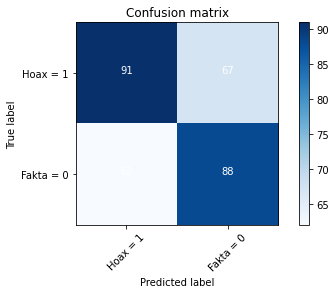

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred_dt, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Hoax = 1', 'Fakta = 0'],normalize = False, title='Confusion matrix')

### 3. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.6428571428571429

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.70      0.47      0.56       150
           1       0.62      0.81      0.70       158

    accuracy                           0.64       308
   macro avg       0.66      0.64      0.63       308
weighted avg       0.66      0.64      0.63       308



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, pred_gbc, labels=[1,0]))

[[128  30]
 [ 80  70]]


### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.672077922077922

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62       150
           1       0.65      0.78      0.71       158

    accuracy                           0.67       308
   macro avg       0.68      0.67      0.67       308
weighted avg       0.68      0.67      0.67       308



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, pred_rfc, labels=[1,0]))

[[124  34]
 [ 67  83]]


Confusion matrix, without normalization
[[124  34]
 [ 67  83]]


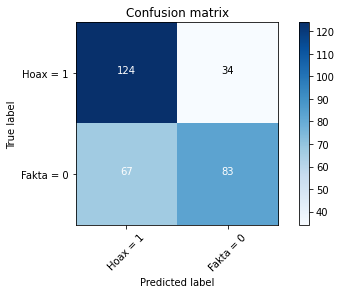

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred_rfc, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Hoax = 1', 'Fakta = 0'],normalize = False, title='Confusion matrix')

### 5. Navy Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB().fit(xv_train, y_train)

In [ ]:
pred_NB = NB.predict(xv_test)

In [ ]:
NB.score(xv_test, y_test)

0.6525974025974026

In [ ]:
print(classification_report(y_test, pred_NB))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       150
           1       0.69      0.58      0.63       158

    accuracy                           0.65       308
   macro avg       0.66      0.65      0.65       308
weighted avg       0.66      0.65      0.65       308



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, pred_NB, labels=[1,0]))

[[ 92  66]
 [ 41 109]]


In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(xv_train, y_train)

SVC()

In [ ]:
pred_svc = NB.predict(xv_test)

In [ ]:
svc.score(xv_test, y_test)

0.698051948051948

In [ ]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       150
           1       0.69      0.58      0.63       158

    accuracy                           0.65       308
   macro avg       0.66      0.65      0.65       308
weighted avg       0.66      0.65      0.65       308



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, pred_svc, labels=[1,0]))

[[ 92  66]
 [ 41 109]]


Confusion matrix, without normalization
[[ 92  66]
 [ 41 109]]


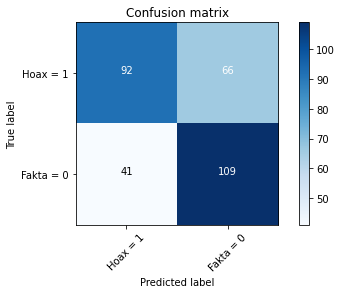

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred_svc, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Hoax = 1', 'Fakta = 0'],normalize = False, title='Confusion matrix')

### Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(random_state=0)
MLPC.fit(xv_train, y_train)

MLPClassifier(random_state=0)

In [ ]:
pred_MLPC = MLPC.predict(xv_test)
pred_MLPC

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [ ]:
MLPC.score(xv_test, y_test)

0.6461038961038961

In [ ]:
print(classification_report(y_test, pred_MLPC))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       150
           1       0.67      0.61      0.64       158

    accuracy                           0.65       308
   macro avg       0.65      0.65      0.65       308
weighted avg       0.65      0.65      0.65       308



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, pred_MLPC, labels=[1,0]))

[[ 96  62]
 [ 47 103]]


Confusion matrix, without normalization
[[ 96  62]
 [ 47 103]]


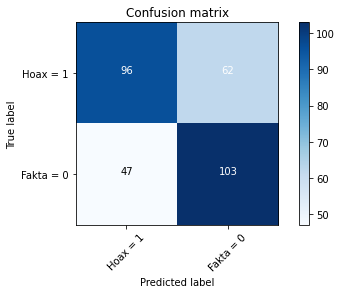

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred_MLPC, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Hoax = 1', 'Fakta = 0'],normalize = False, title='Confusion matrix')

new_def_test["judul"] = new_def_test["judul"].apply(wordopt) 

# Model Testing With Manual Entry

### News

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fakta"
    elif n == 1:
        return "Hoax"
    
def manual_testing(news):
    testing_news = {"judul":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_x_test = new_def_test["judul"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_MLPC = MLPC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nMLPC Prediction: {} ".format(output_lable(pred_LR[0]), 
                                                                                                                                     output_lable(pred_DT[0]), 
                                                                                                                                     output_lable(pred_GBC[0]), 
                                                                                                                                     output_lable(pred_RFC[0]),
                                                                                                                                     output_lable(pred_MLPC[0])))

In [ ]:
news = str(input())
manual_testing(news)